Iteration 1: Guess = 4.999958461393042
Iteration 2: Guess = 4.999916931093806
Iteration 3: Guess = 4.99987540910063
Iteration 4: Guess = 4.999833895411852
Iteration 5: Guess = 4.999792390025812
Iteration 6: Guess = 4.999750892940849
Iteration 7: Guess = 4.999709404155303
Iteration 8: Guess = 4.999667923667515
Iteration 9: Guess = 4.999626451475823
Iteration 10: Guess = 4.9995849875785705
Iteration 11: Guess = 4.999543531974097
Iteration 12: Guess = 4.999502084660745
Iteration 13: Guess = 4.999460645636855
Iteration 14: Guess = 4.99941921490077
Iteration 15: Guess = 4.999377792450832
Iteration 16: Guess = 4.999336378285384
Iteration 17: Guess = 4.999294972402769
Iteration 18: Guess = 4.9992535748013305
Iteration 19: Guess = 4.999212185479412
Iteration 20: Guess = 4.999170804435359
Iteration 21: Guess = 4.999129431667514
Iteration 22: Guess = 4.999088067174223
Iteration 23: Guess = 4.999046710953831
Iteration 24: Guess = 4.999005363004683
Iteration 25: Guess = 4.998964023325124
Iteration

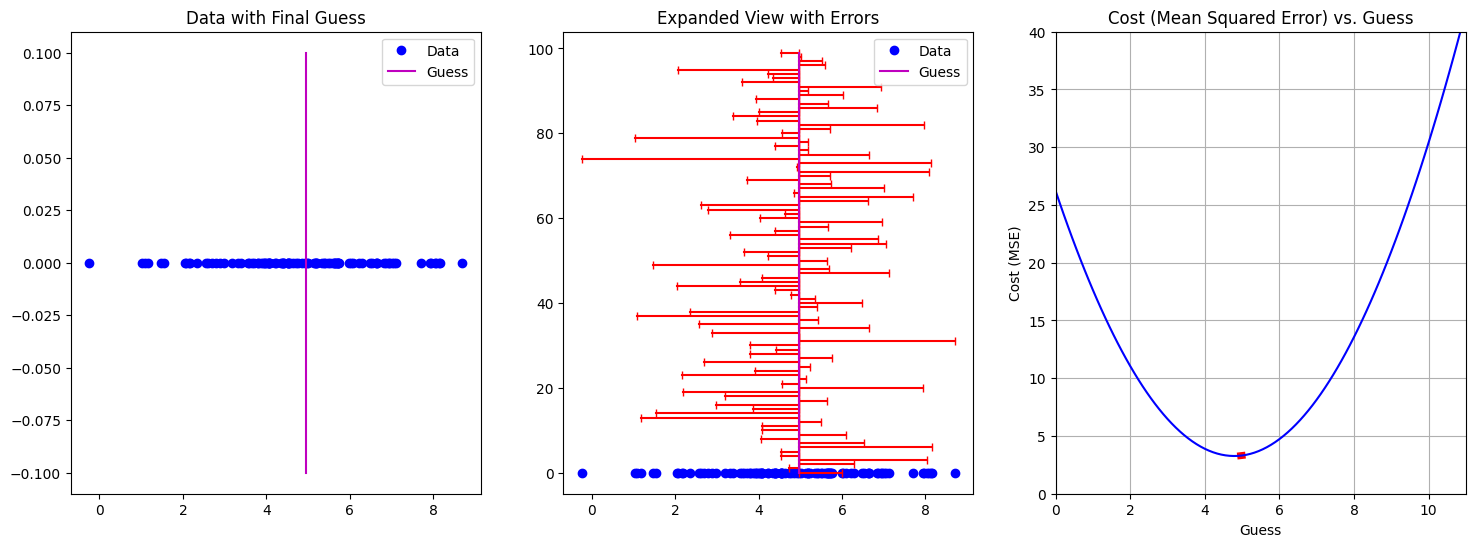

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=100)

def plot_data_and_error(guess, guesses, errors):
    # Plot original data
    plt.figure(figsize=(18, 6))
    plt.subplot(131)
    plt.plot(data, np.zeros_like(data), 'bo', label='Data')
    plt.plot([guess, guess], [-0.1, 0.1], 'm-', label='Guess')
    plt.title('Data with Final Guess')
    plt.legend()

    # Plot expanded view with errors
    plt.subplot(132)

    error_bars = data - guess
    
    plt.plot(data, np.zeros_like(data), 'bo', label='Data')
    for i, error in enumerate(error_bars):
        plt.plot([data[i], guess], [i, i], 'r|-')
    plt.plot([guess, guess], [0, i], 'm-', label='Guess')

    plt.title('Expanded View with Errors')
    plt.legend()

    # Plot cost function
    plt.subplot(133)
    plt.plot(guesses, errors, 'r-',linewidth=5)
    plt.plot(np.linspace(0,11,100),[calculate_mse(x) for x in np.linspace(0,11,100)], 'b-')
    ax = plt.gca()
    ax.set_xlim([0, 11])
    ax.set_ylim([0, 40])
    plt.title('Cost (Mean Squared Error) vs. Guess')
    plt.xlabel('Guess')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)

    plt.show()

def calculate_mse(guess): # note: data is defined in global scope if you wish to call it here, but you can modify your code to pass it for better encapsulation
    return np.mean((data-guess)**2)

def gradient_descent(guess, learning_rate, num_iterations):
    guesses = [guess]
    errors = [calculate_mse(guess)]
    for i in range(num_iterations):
        # Compute gradient
        
        gradient = -2/ len(data) * np.sum(data-guess)
        
        # Update guess
        guess -= learning_rate * gradient
        guesses.append(guess)
        errors.append(calculate_mse(guess))
        
        # Optionally, you can print the current iteration and the updated guess
        print(f"Iteration {i+1}: Guess = {guess}")
    
    return (guess,guesses,errors)

guess = float(input("Enter your initial guess for the mean: "))
learning_rate = float(input("Enter your learning rate: "))
iterations = int(input("Enter the number of iterations: "))
(final_guess,guesses,errors) = gradient_descent(guess,learning_rate,iterations)

print("Final guess of " + str(final_guess) + " based on gradient descent.")
print("Actual mean is " + str(np.mean(data)))

plot_data_and_error(final_guess, guesses, errors)
